# Company Earnings Time Series

In [ ]:
!pip install alpha_vantage
!pip install --upgrade statsmodels
!pip install prophet

In [ ]:
import os 
import numpy as np
import pandas as pd
from datetime import datetime
from alpha_vantage.foreignexchange import ForeignExchange
from pprint import pprint

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## The google drive mounting is for using local **library**

In [ ]:
try:
    # Mount your google drive in google colab
    from google.colab import drive
    drive.mount('/content/drive')

    # Insert the directory to syspath
    import sys
    sys.path.insert(0, '/content/drive/MyDrive/Colab Notebooks')
except:
    pass

In [ ]:
from time_series_utils import timeseries_evaluation_metrics_func,\
                          create_proph_train_test, find_best_Prophet_model,\
                          find_best_ETS_model, find_best_ARIMA_model, find_best_SARIMAX_model,\
                          load_hyperparam, save_hyperparam

## Google NetIncome Time Series

In [ ]:
suffix = 'google_earning'

In [ ]:
from alpha_vantage.fundamentaldata import FundamentalData

In [ ]:
api_key = None
try:
    with open('drive/MyDrive/ALPHAVANTAGE_API_KEY.txt') as f:
        api_key = f.readline()
except:
    api_key = os.environ['ALPHAVANTAGE_API_KEY']

In [ ]:
fun_dat = FundamentalData(key=api_key)

In [ ]:
googl_inc = fun_dat.get_income_statement_quarterly(symbol='GOOGL')

In [ ]:
df2 = pd.DataFrame(googl_inc[0])

In [ ]:
df2.columns

Index(['fiscalDateEnding', 'reportedCurrency', 'grossProfit', 'totalRevenue',
       'costOfRevenue', 'costofGoodsAndServicesSold', 'operatingIncome',
       'sellingGeneralAndAdministrative', 'researchAndDevelopment',
       'operatingExpenses', 'investmentIncomeNet', 'netInterestIncome',
       'interestIncome', 'interestExpense', 'nonInterestIncome',
       'otherNonOperatingIncome', 'depreciation',
       'depreciationAndAmortization', 'incomeBeforeTax', 'incomeTaxExpense',
       'interestAndDebtExpense', 'netIncomeFromContinuingOperations',
       'comprehensiveIncomeNetOfTax', 'ebit', 'ebitda', 'netIncome'],
      dtype='object')

In [ ]:
df2

fiscalDateEnding reportedCurrency  grossProfit totalRevenue costOfRevenue  \
0        2022-03-31              USD  38460000000  68059000000   29599000000   
1        2021-12-31              USD  42152000000  75140000000   32988000000   
2        2021-09-30              USD  37307000000  64928000000   27621000000   
3        2021-06-30              USD  35653000000  61880000000   26227000000   
4        2021-03-31              USD  31211000000  55314000000   24103000000   
5        2020-12-31              USD  30038000000  56118000000   26080000000   
6        2020-09-30              USD  25013000000  46130000000   21117000000   
7        2020-06-30              USD  19744000000  38297000000   18553000000   
8        2020-03-31              USD  22177000000  41159000000   18982000000   
9        2019-12-31              USD  24855000000  45569000000   21020000000   
10       2019-09-30              USD  22935000000  40503000000   17568000000   
11       2019-06-30              USD  21749000000  39045000000   17296000000   
12       2019-03-31              USD  20327000000  36339000000   16012000000   
13       2018-12-31              USD  21358000000  39276000000   17918000000   
14       2018-09-30              USD  19459000000  33740000000   14281000000   
15       2018-06-30              USD  18774000000  32657000000   13883000000   
16       2018-03-31              USD  17679000000  31146000000   13467000000   
17       2017-12-31              USD  18056000000  32323000000   14267000000   
18       2017-09-30              USD  16624000000  27772000000   11148000000   
19       2017-06-30              USD  15637000000  26010000000   10373000000   

   costofGoodsAndServicesSold operatingIncome sellingGeneralAndAdministrative  \
0                 29599000000     20094000000                      9199000000   
1                 32988000000     21885000000                     11744000000   
2                 27621000000     21031000000                      8772000000   
3                 26227000000     19361000000                      8617000000   
4                 24103000000     16437000000                      7289000000   
5                 26080000000     15651000000                      8145000000   
6                 21117000000     11213000000                      6987000000   
7                 18553000000      6383000000                      6486000000   
8                 18982000000      7977000000                      7380000000   
9                 21020000000      9266000000                      8567000000   
10                17568000000      9177000000                      7200000000   
11                17296000000      9180000000                      6255000000   
12                16012000000      6608000000                      5993000000   
13                17918000000      8221000000                      7121000000   
14                14281000000      8625000000                      5917000000   
15                13883000000      3045000000                      5782000000   
16                13467000000      7633000000                      5639000000   
17                14267000000      7696000000                      6086000000   
18                11148000000      7782000000                      4637000000   
19                10373000000      4132000000                      4597000000   

   researchAndDevelopment operatingExpenses  ... depreciation  \
0              9119000000       18318000000  ...         None   
1              8708000000       20452000000  ...         None   
2              7694000000       16466000000  ...         None   
3              7675000000       16292000000  ...         None   
4              7485000000       14774000000  ...         None   
5              7022000000       15167000000  ...         None   
6              6856000000       13843000000  ...         None   
7              6875000000       13361000000  ...         None   
8              6820000000       142

In [ ]:
# make it ascending 
df2 = df2[::-1]

In [ ]:
df2.rename(columns={'fiscalDateEnding': 'time'},inplace=True)
df2.time = pd.to_datetime(df2.time)
df2.dtypes

time                                 datetime64[ns]
reportedCurrency                             object
grossProfit                                  object
totalRevenue                                 object
costOfRevenue                                object
costofGoodsAndServicesSold                   object
operatingIncome                              object
sellingGeneralAndAdministrative              object
researchAndDevelopment                       object
operatingExpenses                            object
investmentIncomeNet                          object
netInterestIncome                            object
interestIncome                               object
interestExpense                              object
nonInterestIncome                            object
otherNonOperatingIncome                      object
depreciation                                 object
depreciationAndAmortization                  object
incomeBeforeTax                              object
incomeTaxExp

In [ ]:
df2.head()

time reportedCurrency  grossProfit totalRevenue costOfRevenue  \
19 2017-06-30              USD  15637000000  26010000000   10373000000   
18 2017-09-30              USD  16624000000  27772000000   11148000000   
17 2017-12-31              USD  18056000000  32323000000   14267000000   
16 2018-03-31              USD  17679000000  31146000000   13467000000   
15 2018-06-30              USD  18774000000  32657000000   13883000000   

   costofGoodsAndServicesSold operatingIncome sellingGeneralAndAdministrative  \
19                10373000000      4132000000                      4597000000   
18                11148000000      7782000000                      4637000000   
17                14267000000      7696000000                      6086000000   
16                13467000000      7633000000                      5639000000   
15                13883000000      3045000000                      5782000000   

   researchAndDevelopment operatingExpenses  ... depreciation  \
19             4172000000        8769000000  ...         None   
18             4205000000        8842000000  ...         None   
17             4306000000       10392000000  ...         None   
16             5039000000       10678000000  ...         None   
15             5114000000       10896000000  ...         None   

   depreciationAndAmortization incomeBeforeTax incomeTaxExpense  \
19                  1625000000      4377000000        853000000   
18                  1761000000      7979000000       1247000000   
17                  2026000000      8018000000      11038000000   
16                  1986000000     10543000000       1142000000   
15                  2114000000      4215000000       1020000000   

   interestAndDebtExpense netIncomeFromContinuingOperations  \
19               21000000                        3511000000   
18               27000000                        6701000000   
17               36000000                       -3083000000   
16               30000000                        9401000000   
15               27000000                        3195000000   

   comprehensiveIncomeNetOfTax         ebit       ebitda    netIncome  
19                  3965000000   4398000000   6023000000   3524000000  
18                  7714000000   8006000000   9767000000   6732000000  
17                 -3266000000   8054000000    256000000  -3020000000  
16                  9821000000  10573000000  12559000000   9401000000  
15                  2340000000   4242000000   6356000000   3195000000  

[5 rows x 26 columns]

## We will pick netIncome as our target variable

In [ ]:
df2.netIncome = df2.netIncome.astype(str)
df2.netIncome = df2.netIncome.apply(lambda x: x[:-3])

## We scale the netIncome into unit of thousands but cut off 3 zeros. To avoid situation of int to big to convert to C long error.

In [ ]:
df2.netIncome = df2.netIncome.astype(int)
df2 = df2[['time', 'netIncome']]
df2 = df2.set_index('time')
df2 = df2.asfreq('Q')
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2017-06-30 to 2022-03-31
Freq: Q-DEC
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   netIncome  20 non-null     int64
dtypes: int64(1)
memory usage: 320.0 bytes


<AxesSubplot:xlabel='time'>

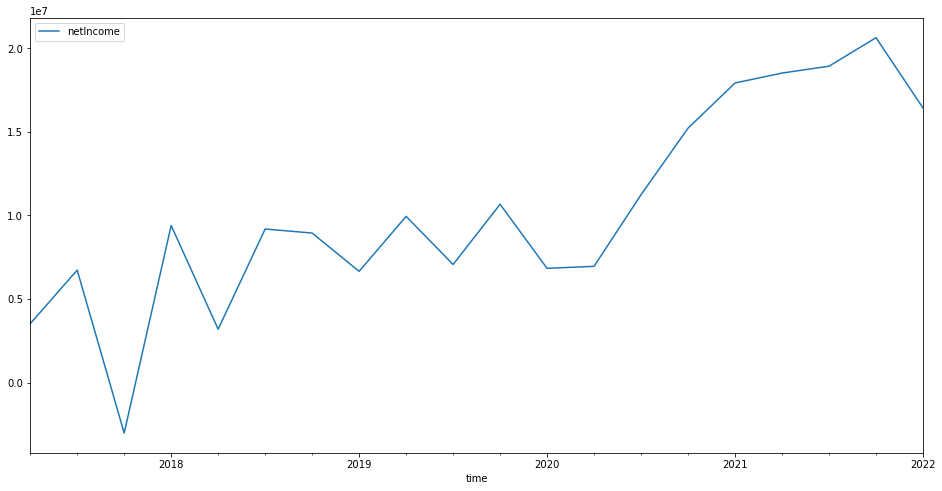

In [ ]:
df2.plot(figsize=(16,8))

In [ ]:
df2.index

DatetimeIndex(['2017-06-30', '2017-09-30', '2017-12-31', '2018-03-31',
               '2018-06-30', '2018-09-30', '2018-12-31', '2019-03-31',
               '2019-06-30', '2019-09-30', '2019-12-31', '2020-03-31',
               '2020-06-30', '2020-09-30', '2020-12-31', '2021-03-31',
               '2021-06-30', '2021-09-30', '2021-12-31', '2022-03-31'],
              dtype='datetime64[ns]', name='time', freq='Q-DEC')

In [ ]:
df2.head()

netIncome
time                 
2017-06-30    3524000
2017-09-30    6732000
2017-12-31   -3020000
2018-03-31    9401000
2018-06-30    3195000

<AxesSubplot:xlabel='time'>

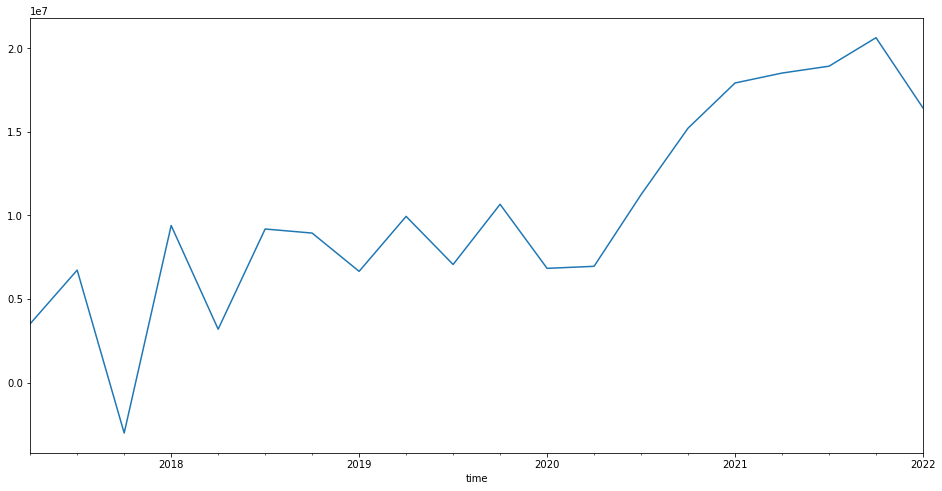

In [ ]:
df2['netIncome'].plot(figsize=(16,8))

In [ ]:
df2.netIncome.tail()

time
2021-03-31    17930000
2021-06-30    18525000
2021-09-30    18936000
2021-12-31    20642000
2022-03-31    16436000
Freq: Q-DEC, Name: netIncome, dtype: int64

In [ ]:
from datetime import datetime, timedelta
train_dataset_end = datetime(2021,3,31)
test_dataset_end = datetime(2022,4,1)

In [ ]:
train_data = df2[:train_dataset_end]
test_data = df2[train_dataset_end+timedelta(days=90):test_dataset_end]

In [ ]:
prediction_length = len(test_data)
prediction_length

4

Save train data and test data to file

In [ ]:
train_data_filename = f'train_data_{suffix}.csv'
test_data_filename = f'test_data_{suffix}.csv'

In [ ]:
train_data.to_csv(train_data_filename, encoding='utf-8')
test_data.to_csv(test_data_filename, encoding='utf-8')

Reload train data and test data from local storage

In [ ]:
train_data = pd.read_csv(train_data_filename, parse_dates=['time'], index_col='time')
train_data = pd.read_csv(train_data_filename, parse_dates=['time'], index_col='time')

In [ ]:
train2_data = train_data[:-(prediction_length)]
val_data = train_data[-(prediction_length):]

In [ ]:
prediction_length, len(val_data), len(train_data), len(train2_data)

(4, 4, 16, 12)

In [ ]:
test_data

netIncome
time                 
2021-06-30   18525000
2021-09-30   18936000
2021-12-31   20642000
2022-03-31   16436000

In [ ]:
# Value Columns to be used in all models tuning
value_col = 'netIncome'

In [ ]:
# freq and date_col for Prophet
ph_freq='Q'
ph_date_col='time'

## Holt Winters Exponential Smoothing (ETS)



Find hyperparameters using train2 and validation data

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
best_ETS_RMSE_model, best_RMSE, best_ETS_RMSE_params, best_ETS_WMAPE_model, best_WMAPE, best_ETS_WMAPE_params\
  = find_best_ETS_model(train2_data, val_data, value_col=value_col, seasonal_periods=[4])

/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.

In [ ]:
best_RMSE, best_ETS_RMSE_params

(4048756.4106928715, ('add', 'add', 4))

In [ ]:
best_WMAPE, best_ETS_WMAPE_params

(0.2716722919169675, ('add', 'add', 4))

We forward forecast with full train data.

In [ ]:
trend, seasonal, seasonal_period = best_ETS_RMSE_params

ETS_model_updated = ExponentialSmoothing(train_data[value_col], trend=trend, seasonal=seasonal,\
                                         seasonal_periods=seasonal_period).fit()

/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [ ]:
test_pred_ETS = ETS_model_updated.forecast(len(test_data))
test_pred_ETS

2021-06-30    1.199647e+07
2021-09-30    1.384352e+07
2021-12-31    1.309663e+07
2022-03-31    1.535697e+07
Freq: Q-DEC, dtype: float64

In [ ]:
test_data['Predicted_ETS'] = test_pred_ETS

<AxesSubplot:xlabel='time'>

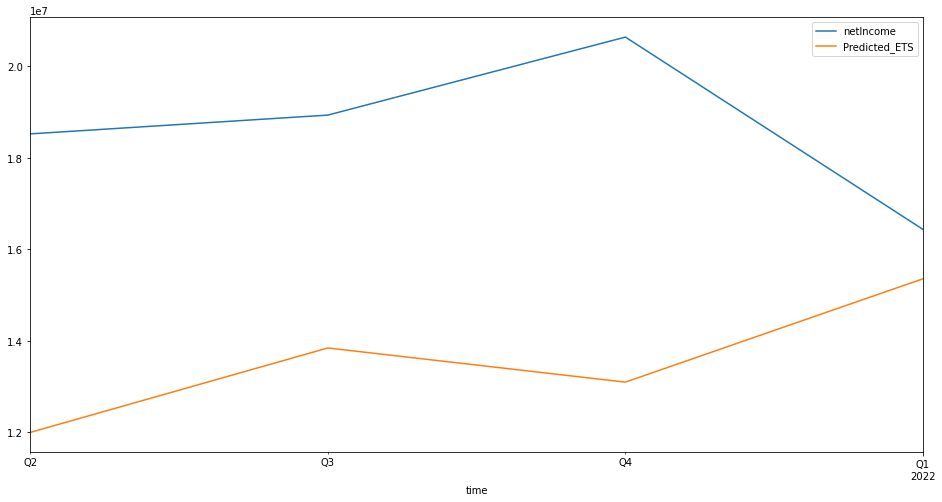

In [ ]:
test_data[[value_col, 'Predicted_ETS']].plot(figsize=(16,8))

## ARIMA model

In [ ]:
## create an ARIMA model
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
arima_model_filename = f"arima_{suffix}_hyper_params"

In [ ]:
# comment out after one run 
# best_params = (11, 1, 0)
# save_hyperparam(arima_model_filename, best_params)

In [ ]:
best_params = None 
try:
    best_params = load_hyperparam(arima_model_filename)
except:
    pass 

In [ ]:
# # force hyperparameter recalculation
# best_params = None 

We search for best hyperparameters with train2 data and val data.

In [ ]:
best_ARIMA_RMSE_model, best_RMSE, best_pdq_RMSE, best_ARIMA_WMAPE_model, best_WMAPE, best_pdq_WMAPE\
     = find_best_ARIMA_model(train2_data, val_data, value_col=value_col, best_params=best_params)

/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packa

In [ ]:
best_pdq_RMSE, best_RMSE

((6, 1, 1), 3758399.503040706)

In [ ]:
# save to file 
save_hyperparam(arima_model_filename, best_pdq_RMSE)

In [ ]:
best_pdq_WMAPE, best_WMAPE

((6, 1, 1), 0.27530859665658197)

Update the model with new data (full train data)

In [ ]:
model_ARIMA = ARIMA(train_data[value_col], order=best_pdq_RMSE).fit()

/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
test_pred_arima = model_ARIMA.predict(start=test_data.index[0], end=test_data.index[-1])

In [ ]:
test_data['Predicted_ARIMA'] = test_pred_arima

<AxesSubplot:xlabel='time'>

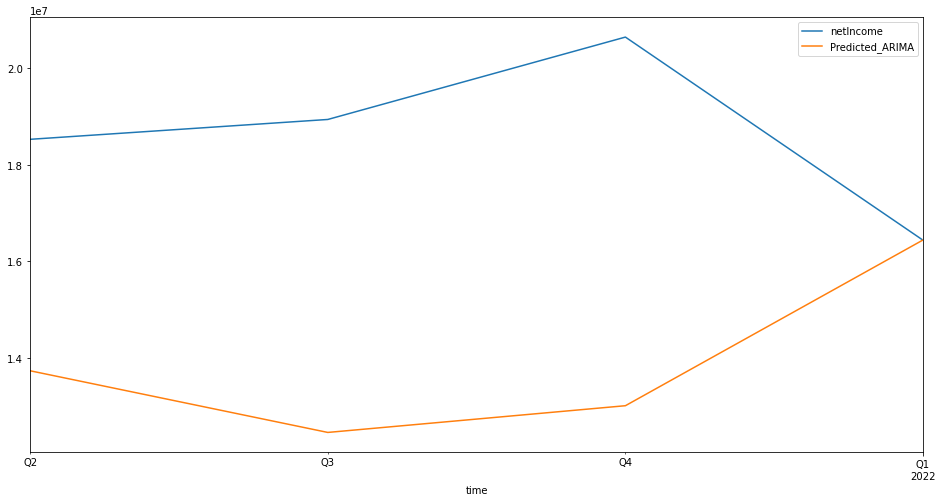

In [ ]:
test_data[[value_col, 'Predicted_ARIMA']].plot(figsize=(16,8))

## SARIMAX model

In [ ]:
# create a SARIMAX model 
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
sarimax_model_filename = f"sarimax_{suffix}_hyper_params"

In [ ]:
# run once then delete this 
# best_params = (0, 0, 2, 4)
# save_hyperparam(sarimax_model_filename, best_params)

In [ ]:
best_params = None 
try:
    best_params = load_hyperparam(sarimax_model_filename)
except:
    pass 

In [ ]:
# # force hyperparams recalculation 
# best_params = None 

In [ ]:
# we get best pdq from ARIMA (=best_pdq) and seaonal_period from ETS best params
#seasonal_period = best_ETS_params[2]
best_pdq = best_pdq_RMSE
seasonal_period = best_ETS_RMSE_params[2]

We find hyperparams with train2 and validation data.

In [ ]:
best_SARIMAX_model, best_RMSE, best_PDQS = find_best_SARIMAX_model(train2_data, val_data, best_pdq, \
                                                                  value_col=value_col, season_period=seasonal_period,\
                                                                   best_params=best_params)

/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.50044D+22    |proj g|=  1.57865D+27

At iterate    5    f=  8.83701D+15    |proj g|=  7.00098D+17

At iterate   10    f=  1.20583D+15    |proj g|=  3.53242D+16

At iterate   15    f=  1.62880D+14    |proj g|=  1.76281D+15

At iterate   20    f=  2.12020D+13    |proj g|=  8.55546D+13

At iterate   25    f=  2.50575D+12    |proj g|=  3.92322D+12

At iterate   30    f=  2.93052D+11    |proj g|=  1.84660D+11

At iterate   35    f=  3.71932D+10    |proj g|=  1.12756D+10

At iterate   40    f=  6.73667D+09    |proj g|=  3.57058D+09

At iterate   45    f=  9.58891D+08    |proj g|=  2.08562D+08

At iterate   50    f=  2.72965D+08    |proj g|=  1.92347D+07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  1.62871D+14    |proj g|=  1.76273D+15

At iterate   20    f=  2.11736D+13    |proj g|=  8.54476D+13

At iterate   25    f=  2.38127D+12    |proj g|=  3.74328D+12

At iterate   30    f=  1.58604D+11    |proj g|=  1.06121D+11

At iterate   35    f=  3.26114D+10    |proj g|=  1.18371D+10

At iterate   40    f=  4.25134D+09    |proj g|=  2.09898D+09

At iterate   45    f=  1.42493D+09    |proj g|=  1.11792D+09

At iterate   50    f=  1.75875D+08    |proj g|=  5.73364D+07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     69      1     0     0   5.734D+07   1.759D+08
  F =   175874625.722

/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  8.83694D+15    |proj g|=  7.00094D+17

At iterate   10    f=  1.20572D+15    |proj g|=  3.53216D+16

At iterate   15    f=  1.62744D+14    |proj g|=  1.76163D+15

At iterate   20    f=  2.10244D+13    |proj g|=  8.49504D+13

At iterate   25    f=  2.26442D+12    |proj g|=  3.60487D+12

At iterate   30    f=  2.27494D+11    |proj g|=  1.61656D+11

At iterate   35    f=  3.03851D+10    |proj g|=  1.58013D+10

At iterate   40    f=  4.65349D+09    |proj g|=  2.81595D+09

At iterate   45    f=  8.68276D+08    |proj g|=  1.42526D+09

At iterate   50    f=  1.59808D+08    |proj g|=  5.50922D+07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
/home/wismin/min


At iterate    5    f=  9.89633D+00    |proj g|=  5.96869D-03

At iterate   10    f=  9.89525D+00    |proj g|=  1.03631D-03

At iterate   15    f=  9.89522D+00    |proj g|=  2.53954D-04

At iterate   20    f=  9.89513D+00    |proj g|=  2.00315D-03

At iterate   25    f=  9.89462D+00    |proj g|=  2.45552D-03

At iterate   30    f=  9.89454D+00    |proj g|=  4.37379D-04

At iterate   35    f=  9.89452D+00    |proj g|=  3.81849D-04

At iterate   40    f=  9.89452D+00    |proj g|=  1.04828D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     40     44      1     0     0   1.048D-05   9.895D+00
  F =   9.89452084333

/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.01603D+01    |proj g|=  5.05564D-01

At iterate    5    f=  9.89620D+00    |proj g|=  7.56769D-03

At iterate   10    f=  9.89487D+00    |proj g|=  2.25531D-03

At iterate   15    f=  9.89480D+00    |proj g|=  7.35185D-04

At iterate   20    f=  9.89478D+00    |proj g|=  4.67834D-05

At iterate   25    f=  9.89477D+00    |proj g|=  1.76706D-04

At iterate   30    f=  9.89477D+00    |proj g|=  4.00933D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

In [ ]:
best_RMSE, best_PDQS

(3758399.503040706, (0, 0, 0, 4))

In [ ]:
# save to file 
save_hyperparam(sarimax_model_filename, best_PDQS)


best_RMSE, best_PDQS

(5267094.762704609, (0, 0, 2, 4))


We train model with full train data.

In [ ]:
model_SARIMAX = SARIMAX(train_data[value_col], order=best_pdq_RMSE, seasonal_order=best_PDQS).fit()

/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.11572D+01    |proj g|=  9.93689D+00

At iterate    5    f=  1.66539D+01    |proj g|=  4.57272D-01

At iterate   10    f=  1.63653D+01    |proj g|=  1.60461D-01

At iterate   15    f=  1.62615D+01    |proj g|=  6.79355D-02

At iterate   20    f=  1.61827D+01    |proj g|=  1.67983D-01

At iterate   25    f=  1.61509D+01    |proj g|=  1.15530D-01

At iterate   30    f=  1.61413D+01    |proj g|=  1.46813D-02

At iterate   35    f=  1.61206D+01    |proj g|=  1.22213D-01

At iterate   40    f=  1.61052D+01    |proj g|=  4.70127D-02

At iterate   45    f=  1.60988D+01    |proj g|=  4.05412D-02

At iterate   50    f=  1.60957D+01    |proj g|=  8.01555D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
test_pred_SARIMAX = model_SARIMAX.predict(start=test_data.index[0], end=test_data.index[-1])

In [ ]:
test_data['Predicted_SARIMAX'] = test_pred_SARIMAX

<AxesSubplot:xlabel='time'>

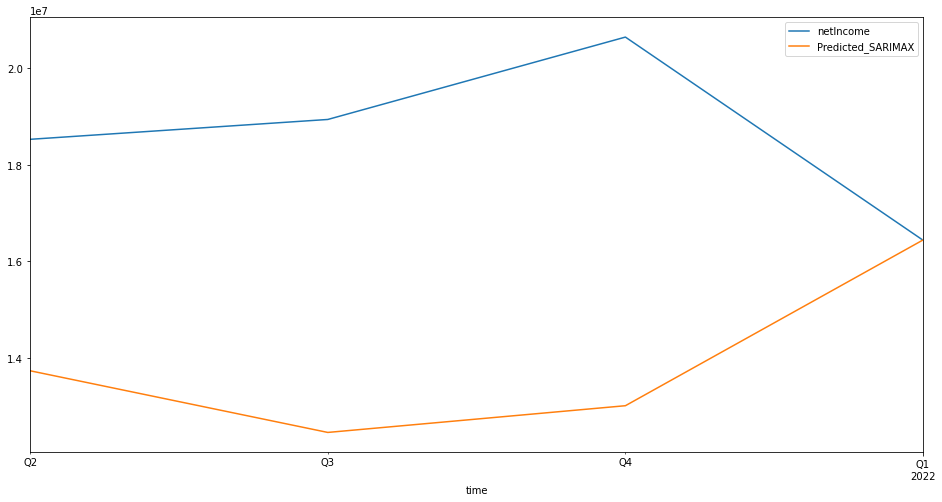

In [ ]:
test_data[[value_col, 'Predicted_SARIMAX']].plot(figsize=(16,8))

## Prophet

In [ ]:
from prophet import Prophet

In [ ]:
prophet_model_filename = f"prophet_{suffix}_hyper_params"

In [ ]:
# run once then delete this cell 
# best_params = (0.8, 0.3, 0.1, 'multiplicative')
# save_hyperparam(prophet_model_filename, best_params)

In [ ]:
best_params = None 
try:
    best_params = load_hyperparam(prophet_model_filename)
except:
    pass 

In [ ]:
# # force hyperparams recalculation 
# best_params = None 

In [ ]:
proph_train2, proph_val = create_proph_train_test(train2_data, val_data, date_col=ph_date_col, value_col=value_col)
proph_train, proph_test = create_proph_train_test(train_data, test_data, date_col=ph_date_col, value_col=value_col)

Find the best hyperparameters with train2 and validation data. 

In [ ]:
best_Prophet_RMSE_model, best_RMSE, best_Prophet_RMSE_params,\
best_Prophet_WMAPE_model, best_WMAPE, best_Prophet_WMAPE_params\
   = find_best_Prophet_model(proph_train2, proph_val, val_data, value_col=value_col,freq=ph_freq,\
                             best_params=best_params)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 8.



Initial log joint probability = 27.1121
Iteration  1. Log joint probability =    5.82927. Improved by -21.2829.
Iteration  2. Log joint probability =    7.91274. Improved by 2.08347.
Iteration  3. Log joint probability =     8.0492. Improved by 0.136465.
Iteration  4. Log joint probability =    8.23395. Improved by 0.184752.
Iteration  5. Log joint probability =    8.33595. Improved by 0.101993.
Iteration  6. Log joint probability =     8.3932. Improved by 0.0572511.
Iteration  7. Log joint probability =    8.64902. Improved by 0.255818.
Iteration  8. Log joint probability =    8.68876. Improved by 0.0397477.
Iteration  9. Log joint probability =    8.77541. Improved by 0.086642.
Iteration 10. Log joint probability =    8.79513. Improved by 0.0197259.
Iteration 11. Log joint probability =    8.82724. Improved by 0.0321054.
Iteration 12. Log joint probability =    8.89376. Improved by 0.066528.
Iteration 13. Log joint probability =    8.89877. Improved by 0.00500727.
Iteration 14. Log 

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 8.


current WMAPE values:  1.2534092171168167

Initial log joint probability = 27.1121
Iteration  1. Log joint probability =    5.63539. Improved by -21.4767.
Iteration  2. Log joint probability =     7.3893. Improved by 1.75391.
Iteration  3. Log joint probability =    7.59665. Improved by 0.207342.
Iteration  4. Log joint probability =    7.82131. Improved by 0.224665.
Iteration  5. Log joint probability =    7.93938. Improved by 0.118064.
Iteration  6. Log joint probability =    8.06626. Improved by 0.126882.
Iteration  7. Log joint probability =    8.16473. Improved by 0.0984715.
Iteration  8. Log joint probability =    8.16882. Improved by 0.00408666.
Iteration  9. Log joint probability =    8.18602. Improved by 0.0172022.
Iteration 10. Log joint probability =     8.2826. Improved by 0.0965848.
Iteration 11. Log joint probability =    8.32196. Improved by 0.0393524.
Iteration 12. Log joint probability =    8.34574. Improved by 0.0237892.
Iteration 13. Log joint probability =    8.3492

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 8.


current WMAPE values:  1.2189845777079493

Initial log joint probability = -32.8025
Iteration  1. Log joint probability =    6.04004. Improved by 38.8425.
Iteration  2. Log joint probability =    7.48281. Improved by 1.44277.
Iteration  3. Log joint probability =    9.91637. Improved by 2.43356.
Iteration  4. Log joint probability =    11.0736. Improved by 1.15721.
Iteration  5. Log joint probability =    11.2273. Improved by 0.153721.
Iteration  6. Log joint probability =    11.3676. Improved by 0.140285.
Iteration  7. Log joint probability =    11.3716. Improved by 0.00397625.
Iteration  8. Log joint probability =    11.3774. Improved by 0.0058152.
Iteration  9. Log joint probability =    11.3774. Improved by 4.11783e-05.
Iteration 10. Log joint probability =    11.4073. Improved by 0.029832.
Iteration 11. Log joint probability =    11.4111. Improved by 0.00383937.
Iteration 12. Log joint probability =    11.4218. Improved by 0.0107542.
Iteration 13. Log joint probability =    11.428

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 8.


current WMAPE values:  1.9528338389957263

Initial log joint probability = -32.8025
Iteration  1. Log joint probability =    3.89136. Improved by 36.6939.
Iteration  2. Log joint probability =    9.07433. Improved by 5.18297.
Iteration  3. Log joint probability =    9.25245. Improved by 0.178116.
Iteration  4. Log joint probability =    9.87609. Improved by 0.623644.
Iteration  5. Log joint probability =    11.1186. Improved by 1.24252.
Iteration  6. Log joint probability =    12.2207. Improved by 1.10207.
Iteration  7. Log joint probability =    13.9213. Improved by 1.70057.
Iteration  8. Log joint probability =    14.0913. Improved by 0.170091.
Iteration  9. Log joint probability =    15.7265. Improved by 1.63518.
Iteration 10. Log joint probability =    16.5633. Improved by 0.836814.
Iteration 11. Log joint probability =    16.7067. Improved by 0.143399.
Iteration 12. Log joint probability =    16.8426. Improved by 0.135837.
Iteration 13. Log joint probability =    16.8561. Improved

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 8.


current WMAPE values:  4.058048182245053

Initial log joint probability = -64.9913
Iteration  1. Log joint probability =    6.67306. Improved by 71.6643.
Iteration  2. Log joint probability =    8.95395. Improved by 2.28089.
Iteration  3. Log joint probability =    12.9402. Improved by 3.98629.
Iteration  4. Log joint probability =     14.106. Improved by 1.16576.
Iteration  5. Log joint probability =    16.0906. Improved by 1.98456.
Iteration  6. Log joint probability =     16.157. Improved by 0.0664551.
Iteration  7. Log joint probability =    16.2004. Improved by 0.0433444.
Iteration  8. Log joint probability =    16.2127. Improved by 0.0123714.
Iteration  9. Log joint probability =    16.2194. Improved by 0.00662592.
Iteration 10. Log joint probability =    16.2332. Improved by 0.0138609.
Iteration 11. Log joint probability =    16.2688. Improved by 0.0355468.
Iteration 12. Log joint probability =    16.3047. Improved by 0.0359252.
Iteration 13. Log joint probability =    16.3094. 

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 8.


current WMAPE values:  5.178077096770254

Initial log joint probability = -64.9913
Iteration  1. Log joint probability =   -2.33212. Improved by 62.6591.
Iteration  2. Log joint probability =    11.3727. Improved by 13.7048.
Iteration  3. Log joint probability =    12.5115. Improved by 1.13879.
Iteration  4. Log joint probability =    15.9145. Improved by 3.40297.
Iteration  5. Log joint probability =    17.0825. Improved by 1.168.
Iteration  6. Log joint probability =    17.7786. Improved by 0.696096.
Iteration  7. Log joint probability =    18.1577. Improved by 0.379194.
Iteration  8. Log joint probability =    18.2791. Improved by 0.121376.
Iteration  9. Log joint probability =    18.3947. Improved by 0.115537.
Iteration 10. Log joint probability =    18.4899. Improved by 0.0952731.
Iteration 11. Log joint probability =    18.5571. Improved by 0.0672094.
Iteration 12. Log joint probability =    18.5823. Improved by 0.0251359.
Iteration 13. Log joint probability =    18.6618. Improve

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 8.


current WMAPE values:  4.10285891087691

Initial log joint probability = 21.567
Iteration  1. Log joint probability =    5.82928. Improved by -15.7377.
Iteration  2. Log joint probability =    7.94545. Improved by 2.11617.
Iteration  3. Log joint probability =    8.14746. Improved by 0.202008.
Iteration  4. Log joint probability =    8.58145. Improved by 0.433992.
Iteration  5. Log joint probability =    8.66851. Improved by 0.0870578.
Iteration  6. Log joint probability =    8.73913. Improved by 0.0706228.
Iteration  7. Log joint probability =    8.79951. Improved by 0.0603824.
Iteration  8. Log joint probability =    8.82419. Improved by 0.0246729.
Iteration  9. Log joint probability =     8.8579. Improved by 0.0337176.
Iteration 10. Log joint probability =    8.87176. Improved by 0.0138586.
Iteration 11. Log joint probability =     8.8829. Improved by 0.011139.
Iteration 12. Log joint probability =     8.8975. Improved by 0.0146037.
Iteration 13. Log joint probability =    8.91148. 

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 8.


current WMAPE values:  1.253778337826016

Initial log joint probability = 21.567
Iteration  1. Log joint probability =     5.6354. Improved by -15.9316.
Iteration  2. Log joint probability =    7.42199. Improved by 1.78659.
Iteration  3. Log joint probability =    7.69474. Improved by 0.272753.
Iteration  4. Log joint probability =    8.16861. Improved by 0.473873.
Iteration  5. Log joint probability =    8.27371. Improved by 0.105097.
Iteration  6. Log joint probability =    8.31795. Improved by 0.0442422.
Iteration  7. Log joint probability =    8.32283. Improved by 0.00487975.
Iteration  8. Log joint probability =    8.39835. Improved by 0.0755177.
Iteration  9. Log joint probability =    8.44857. Improved by 0.0502243.
Iteration 10. Log joint probability =    8.48082. Improved by 0.0322481.
Iteration 11. Log joint probability =    8.48552. Improved by 0.00469977.
Iteration 12. Log joint probability =    8.49142. Improved by 0.00589701.
Iteration 13. Log joint probability =    8.493

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 8.


current WMAPE values:  1.2192757697740189

Initial log joint probability = -38.3477
Iteration  1. Log joint probability =    6.04005. Improved by 44.3877.
Iteration  2. Log joint probability =    7.49871. Improved by 1.45865.
Iteration  3. Log joint probability =    9.92286. Improved by 2.42416.
Iteration  4. Log joint probability =    11.1997. Improved by 1.27683.
Iteration  5. Log joint probability =    11.2953. Improved by 0.0955982.
Iteration  6. Log joint probability =    11.3043. Improved by 0.00898606.
Iteration  7. Log joint probability =    11.3559. Improved by 0.0516067.
Iteration  8. Log joint probability =    11.3697. Improved by 0.0138228.
Iteration  9. Log joint probability =    11.3872. Improved by 0.0174566.
Iteration 10. Log joint probability =    11.3966. Improved by 0.0094764.
Iteration 11. Log joint probability =     11.432. Improved by 0.035345.
Iteration 12. Log joint probability =    11.4343. Improved by 0.00232331.
Iteration 13. Log joint probability =    11.437

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 8.


current WMAPE values:  1.9519345697759718

Initial log joint probability = -38.3477
Iteration  1. Log joint probability =    3.89136. Improved by 42.239.
Iteration  2. Log joint probability =    9.08248. Improved by 5.19112.
Iteration  3. Log joint probability =    9.25244. Improved by 0.169962.
Iteration  4. Log joint probability =    9.91233. Improved by 0.65989.
Iteration  5. Log joint probability =    11.1465. Improved by 1.23417.
Iteration  6. Log joint probability =    12.2486. Improved by 1.10206.
Iteration  7. Log joint probability =    14.0273. Improved by 1.77871.
Iteration  8. Log joint probability =    15.1986. Improved by 1.17132.
Iteration  9. Log joint probability =    16.1834. Improved by 0.984793.
Iteration 10. Log joint probability =    16.1921. Improved by 0.00873607.
Iteration 11. Log joint probability =    16.2237. Improved by 0.0315699.
Iteration 12. Log joint probability =    16.2649. Improved by 0.0411686.
Iteration 13. Log joint probability =     16.343. Improv

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 8.


current WMAPE values:  4.0580071337631125

Initial log joint probability = -70.5364
Iteration  1. Log joint probability =    6.67306. Improved by 77.2095.
Iteration  2. Log joint probability =    8.96042. Improved by 2.28735.
Iteration  3. Log joint probability =    12.9419. Improved by 3.98151.
Iteration  4. Log joint probability =    14.1245. Improved by 1.18253.
Iteration  5. Log joint probability =    16.1696. Improved by 2.0451.
Iteration  6. Log joint probability =    16.2628. Improved by 0.0932372.
Iteration  7. Log joint probability =    16.2903. Improved by 0.0274996.
Iteration  8. Log joint probability =    16.2923. Improved by 0.00203419.
Iteration  9. Log joint probability =    16.3118. Improved by 0.0194997.
Iteration 10. Log joint probability =    16.3312. Improved by 0.0193795.
Iteration 11. Log joint probability =    16.3336. Improved by 0.00242892.
Iteration 12. Log joint probability =    16.3367. Improved by 0.00306881.
Iteration 13. Log joint probability =    16.3374

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 8.


current WMAPE values:  5.174082501414226

Initial log joint probability = -70.5364
Iteration  1. Log joint probability =   -2.33214. Improved by 68.2043.
Iteration  2. Log joint probability =    11.4064. Improved by 13.7386.
Iteration  3. Log joint probability =    12.5251. Improved by 1.11871.
Iteration  4. Log joint probability =    15.9336. Improved by 3.40849.
Iteration  5. Log joint probability =    17.0776. Improved by 1.14396.
Iteration  6. Log joint probability =    17.7789. Improved by 0.70132.
Iteration  7. Log joint probability =    17.9686. Improved by 0.18973.
Iteration  8. Log joint probability =    18.3392. Improved by 0.370564.
Iteration  9. Log joint probability =    18.4573. Improved by 0.118123.
Iteration 10. Log joint probability =    18.4705. Improved by 0.013208.
Iteration 11. Log joint probability =    18.4779. Improved by 0.00735451.
Iteration 12. Log joint probability =      18.53. Improved by 0.0521168.
Iteration 13. Log joint probability =    18.5361. Improve

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 8.


current WMAPE values:  4.102541194226143

Initial log joint probability = 12.7781
Iteration  1. Log joint probability =    5.82931. Improved by -6.94875.
Iteration  2. Log joint probability =    7.96732. Improved by 2.138.
Iteration  3. Log joint probability =    8.21351. Improved by 0.246194.
Iteration  4. Log joint probability =     8.6646. Improved by 0.451091.
Iteration  5. Log joint probability =    8.73765. Improved by 0.0730521.
Iteration  6. Log joint probability =    8.74667. Improved by 0.00901345.
Iteration  7. Log joint probability =    8.77004. Improved by 0.0233713.
Iteration  8. Log joint probability =    8.77588. Improved by 0.0058443.
Iteration  9. Log joint probability =    8.77846. Improved by 0.00257627.
Iteration 10. Log joint probability =    8.77927. Improved by 0.000811464.
Iteration 11. Log joint probability =    8.83435. Improved by 0.0550794.
Iteration 12. Log joint probability =    8.85454. Improved by 0.0201945.
Iteration 13. Log joint probability =    8.86

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 8.


current WMAPE values:  1.2535420216532371

Initial log joint probability = 12.7781
Iteration  1. Log joint probability =    5.63543. Improved by -7.14264.
Iteration  2. Log joint probability =    7.44372. Improved by 1.80829.
Iteration  3. Log joint probability =    7.76013. Improved by 0.316414.
Iteration  4. Log joint probability =    8.27223. Improved by 0.512093.
Iteration  5. Log joint probability =     8.2791. Improved by 0.00687316.
Iteration  6. Log joint probability =    8.28829. Improved by 0.00919183.
Iteration  7. Log joint probability =    8.31351. Improved by 0.0252189.
Iteration  8. Log joint probability =    8.33622. Improved by 0.0227068.
Iteration  9. Log joint probability =    8.34098. Improved by 0.00476004.
Iteration 10. Log joint probability =     8.3444. Improved by 0.00342845.
Iteration 11. Log joint probability =    8.34696. Improved by 0.00255374.
Iteration 12. Log joint probability =    8.36326. Improved by 0.0163048.
Iteration 13. Log joint probability =    

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 8.


current WMAPE values:  1.2185972342259694

Initial log joint probability = -47.1366
Iteration  1. Log joint probability =    6.04008. Improved by 53.1767.
Iteration  2. Log joint probability =    7.50777. Improved by 1.46769.
Iteration  3. Log joint probability =    9.92303. Improved by 2.41526.
Iteration  4. Log joint probability =    11.2909. Improved by 1.36783.
Iteration  5. Log joint probability =    11.3189. Improved by 0.0280248.
Iteration  6. Log joint probability =    11.3324. Improved by 0.0135554.
Iteration  7. Log joint probability =    11.3364. Improved by 0.00397395.
Iteration  8. Log joint probability =    11.3448. Improved by 0.00839725.
Iteration  9. Log joint probability =      11.36. Improved by 0.0152156.
Iteration 10. Log joint probability =    11.3947. Improved by 0.0347002.
Iteration 11. Log joint probability =    11.4236. Improved by 0.0288804.
Iteration 12. Log joint probability =    11.4239. Improved by 0.000259668.
Iteration 13. Log joint probability =     11

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 8.


current WMAPE values:  1.9534017130972035

Initial log joint probability = -47.1366
Iteration  1. Log joint probability =    3.89136. Improved by 51.0279.
Iteration  2. Log joint probability =    9.08669. Improved by 5.19533.
Iteration  3. Log joint probability =    9.25163. Improved by 0.164938.
Iteration  4. Log joint probability =    9.95492. Improved by 0.70329.
Iteration  5. Log joint probability =    11.1201. Improved by 1.16518.
Iteration  6. Log joint probability =    11.9164. Improved by 0.79631.
Iteration  7. Log joint probability =    13.6023. Improved by 1.68589.
Iteration  8. Log joint probability =    15.0008. Improved by 1.39846.
Iteration  9. Log joint probability =    16.2181. Improved by 1.21732.
Iteration 10. Log joint probability =    16.4972. Improved by 0.279102.
Iteration 11. Log joint probability =    16.5383. Improved by 0.0410864.
Iteration 12. Log joint probability =    16.6124. Improved by 0.0740823.
Iteration 13. Log joint probability =    16.6426. Improved

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 8.


current WMAPE values:  4.057810036414888

Initial log joint probability = -79.3253
Iteration  1. Log joint probability =    6.67309. Improved by 85.9984.
Iteration  2. Log joint probability =    8.95525. Improved by 2.28216.
Iteration  3. Log joint probability =    12.9326. Improved by 3.97739.
Iteration  4. Log joint probability =       14.1. Improved by 1.16739.
Iteration  5. Log joint probability =    16.2353. Improved by 2.13529.
Iteration  6. Log joint probability =    16.2993. Improved by 0.0640164.
Iteration  7. Log joint probability =    16.3022. Improved by 0.00284663.
Iteration  8. Log joint probability =     16.308. Improved by 0.00583582.
Iteration  9. Log joint probability =    16.3184. Improved by 0.0103562.
Iteration 10. Log joint probability =    16.3186. Improved by 0.000239497.
Iteration 11. Log joint probability =    16.3261. Improved by 0.00744825.
Iteration 12. Log joint probability =    16.3301. Improved by 0.00399237.
Iteration 13. Log joint probability =     16.

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 8.


current WMAPE values:  5.178498994939687

Initial log joint probability = -79.3253
Iteration  1. Log joint probability =   -2.33226. Improved by 76.9931.
Iteration  2. Log joint probability =    11.4323. Improved by 13.7646.
Iteration  3. Log joint probability =    12.4872. Improved by 1.05488.
Iteration  4. Log joint probability =    15.9834. Improved by 3.49616.
Iteration  5. Log joint probability =    17.1948. Improved by 1.21143.
Iteration  6. Log joint probability =    18.0002. Improved by 0.80538.
Iteration  7. Log joint probability =    18.1667. Improved by 0.166506.
Iteration  8. Log joint probability =    18.3001. Improved by 0.133423.
Iteration  9. Log joint probability =    18.3024. Improved by 0.00224682.
Iteration 10. Log joint probability =    18.3058. Improved by 0.00340725.
Iteration 11. Log joint probability =    18.4488. Improved by 0.142985.
Iteration 12. Log joint probability =    18.4612. Improved by 0.012458.
Iteration 13. Log joint probability =    18.4836. Impro

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 8.


current WMAPE values:  4.102028475903837

Initial log joint probability = 8.69146
Iteration  1. Log joint probability =    5.82934. Improved by -2.86212.
Iteration  2. Log joint probability =    7.97174. Improved by 2.1424.
Iteration  3. Log joint probability =    8.22724. Improved by 0.255499.
Iteration  4. Log joint probability =    8.22932. Improved by 0.00208128.
Iteration  5. Log joint probability =    8.23119. Improved by 0.00186845.
Iteration  6. Log joint probability =    8.24402. Improved by 0.0128323.
Iteration  7. Log joint probability =    8.66497. Improved by 0.42095.
Iteration  8. Log joint probability =    8.69239. Improved by 0.027416.
Iteration  9. Log joint probability =    8.72499. Improved by 0.0325975.
Iteration 10. Log joint probability =    8.73377. Improved by 0.00878036.
Iteration 11. Log joint probability =    8.76297. Improved by 0.0292057.
Iteration 12. Log joint probability =    8.76479. Improved by 0.00181995.
Iteration 13. Log joint probability =    8.794

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 8.


current WMAPE values:  1.2541828090012306

Initial log joint probability = 8.69146
Iteration  1. Log joint probability =    5.63546. Improved by -3.056.
Iteration  2. Log joint probability =    7.44801. Improved by 1.81256.
Iteration  3. Log joint probability =    7.77321. Improved by 0.325195.
Iteration  4. Log joint probability =     7.7741. Improved by 0.000890715.
Iteration  5. Log joint probability =    7.77833. Improved by 0.004232.
Iteration  6. Log joint probability =    7.78228. Improved by 0.00394996.
Iteration  7. Log joint probability =    7.78843. Improved by 0.00614452.
Iteration  8. Log joint probability =    7.79047. Improved by 0.0020461.
Iteration  9. Log joint probability =     7.7927. Improved by 0.00223312.
Iteration 10. Log joint probability =    8.34081. Improved by 0.548109.
Iteration 11. Log joint probability =    8.36281. Improved by 0.022001.
Iteration 12. Log joint probability =    8.36556. Improved by 0.00274795.
Iteration 13. Log joint probability =    8.3

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 8.


current WMAPE values:  1.218100551726013

Initial log joint probability = -51.2232
Iteration  1. Log joint probability =    6.04011. Improved by 57.2633.
Iteration  2. Log joint probability =    7.50714. Improved by 1.46703.
Iteration  3. Log joint probability =    9.92365. Improved by 2.41651.
Iteration  4. Log joint probability =    11.3084. Improved by 1.38479.
Iteration  5. Log joint probability =    11.4208. Improved by 0.112367.
Iteration  6. Log joint probability =    11.4323. Improved by 0.0115206.
Iteration  7. Log joint probability =    11.4338. Improved by 0.00148445.
Iteration  8. Log joint probability =    11.4339. Improved by 6.52026e-05.
Iteration  9. Log joint probability =    11.4377. Improved by 0.00381958.
Iteration 10. Log joint probability =    11.4388. Improved by 0.00110411.
Iteration 11. Log joint probability =    11.4388. Improved by 2.72214e-05.
Iteration 12. Log joint probability =    11.4393. Improved by 0.000503131.
Iteration 13. Log joint probability =    

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 8.


current WMAPE values:  1.9516996472379233

Initial log joint probability = -51.2232
Iteration  1. Log joint probability =    3.89136. Improved by 55.1145.
Iteration  2. Log joint probability =    9.08626. Improved by 5.1949.
Iteration  3. Log joint probability =    9.25223. Improved by 0.165968.
Iteration  4. Log joint probability =    9.96896. Improved by 0.716734.
Iteration  5. Log joint probability =    11.0686. Improved by 1.09968.
Iteration  6. Log joint probability =    12.4433. Improved by 1.37468.
Iteration  7. Log joint probability =    13.4878. Improved by 1.04445.
Iteration  8. Log joint probability =    14.1287. Improved by 0.640965.
Iteration  9. Log joint probability =    15.7877. Improved by 1.65899.
Iteration 10. Log joint probability =    16.6333. Improved by 0.845602.
Iteration 11. Log joint probability =    16.6379. Improved by 0.00458835.
Iteration 12. Log joint probability =    16.6397. Improved by 0.00173899.
Iteration 13. Log joint probability =    16.6485. Impro

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 8.


current WMAPE values:  4.058146290575879

Initial log joint probability = -83.4119
Iteration  1. Log joint probability =    6.67311. Improved by 90.0851.
Iteration  2. Log joint probability =    8.95058. Improved by 2.27746.
Iteration  3. Log joint probability =    12.9258. Improved by 3.97523.
Iteration  4. Log joint probability =     14.048. Improved by 1.12216.
Iteration  5. Log joint probability =    14.8516. Improved by 0.803677.
Iteration  6. Log joint probability =    14.8699. Improved by 0.0182611.
Iteration  7. Log joint probability =    14.8746. Improved by 0.00468829.
Iteration  8. Log joint probability =    14.8769. Improved by 0.00234403.
Iteration  9. Log joint probability =    14.8796. Improved by 0.00268856.
Iteration 10. Log joint probability =    14.8835. Improved by 0.00387203.
Iteration 11. Log joint probability =    14.8894. Improved by 0.00592545.
Iteration 12. Log joint probability =    14.8942. Improved by 0.00482171.
Iteration 13. Log joint probability =    14.

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 8.


current WMAPE values:  5.7080681265518605

Initial log joint probability = -83.4119
Iteration  1. Log joint probability =   -2.33237. Improved by 81.0796.
Iteration  2. Log joint probability =    11.4395. Improved by 13.7719.
Iteration  3. Log joint probability =    12.4321. Improved by 0.99252.
Iteration  4. Log joint probability =    16.0009. Improved by 3.56888.
Iteration  5. Log joint probability =     16.645. Improved by 0.644082.
Iteration  6. Log joint probability =     17.872. Improved by 1.22701.
Iteration  7. Log joint probability =    18.0739. Improved by 0.201851.
Iteration  8. Log joint probability =    18.3352. Improved by 0.261349.
Iteration  9. Log joint probability =    18.5319. Improved by 0.196699.
Iteration 10. Log joint probability =    18.5359. Improved by 0.00398762.
Iteration 11. Log joint probability =    18.5382. Improved by 0.00227682.
Iteration 12. Log joint probability =    18.5472. Improved by 0.0090053.
Iteration 13. Log joint probability =    18.5505. Im

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 9.


current WMAPE values:  4.101880562621296

Initial log joint probability = 29.4147
Iteration  1. Log joint probability =    5.82922. Improved by -23.5855.
Iteration  2. Log joint probability =    7.90476. Improved by 2.07554.
Iteration  3. Log joint probability =    8.02412. Improved by 0.119363.
Iteration  4. Log joint probability =    8.15037. Improved by 0.126241.
Iteration  5. Log joint probability =    8.24514. Improved by 0.0947717.
Iteration  6. Log joint probability =    8.27033. Improved by 0.0251883.
Iteration  7. Log joint probability =     8.4791. Improved by 0.208773.
Iteration  8. Log joint probability =    8.51935. Improved by 0.0402477.
Iteration  9. Log joint probability =    8.64577. Improved by 0.126426.
Iteration 10. Log joint probability =    8.65753. Improved by 0.0117562.
Iteration 11. Log joint probability =    8.69621. Improved by 0.0386777.
Iteration 12. Log joint probability =    8.75515. Improved by 0.058947.
Iteration 13. Log joint probability =    8.78493. 

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 9.


current WMAPE values:  1.2530535478154246

Initial log joint probability = 29.4147
Iteration  1. Log joint probability =    5.63534. Improved by -23.7794.
Iteration  2. Log joint probability =    7.38139. Improved by 1.74606.
Iteration  3. Log joint probability =    7.57153. Improved by 0.190133.
Iteration  4. Log joint probability =    7.73639. Improved by 0.164863.
Iteration  5. Log joint probability =    7.74601. Improved by 0.00962262.
Iteration  6. Log joint probability =    7.79239. Improved by 0.0463766.
Iteration  7. Log joint probability =    7.81129. Improved by 0.0189011.
Iteration  8. Log joint probability =    8.04234. Improved by 0.231052.
Iteration  9. Log joint probability =    8.16321. Improved by 0.120868.
Iteration 10. Log joint probability =    8.22238. Improved by 0.0591668.
Iteration 11. Log joint probability =    8.31396. Improved by 0.0915843.
Iteration 12. Log joint probability =    8.40268. Improved by 0.088723.
Iteration 13. Log joint probability =    8.42031

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 9.


current WMAPE values:  1.2182562632090879

Initial log joint probability = -30.4999
Iteration  1. Log joint probability =       6.04. Improved by 36.5399.
Iteration  2. Log joint probability =     7.4792. Improved by 1.4392.
Iteration  3. Log joint probability =    9.91498. Improved by 2.43577.
Iteration  4. Log joint probability =    11.0424. Improved by 1.12743.
Iteration  5. Log joint probability =    11.2025. Improved by 0.16006.
Iteration  6. Log joint probability =    11.3621. Improved by 0.159596.
Iteration  7. Log joint probability =    11.4073. Improved by 0.0451986.
Iteration  8. Log joint probability =    11.4145. Improved by 0.00718768.
Iteration  9. Log joint probability =    11.4265. Improved by 0.0120543.
Iteration 10. Log joint probability =    11.4291. Improved by 0.00254412.
Iteration 11. Log joint probability =    11.4328. Improved by 0.00377578.
Iteration 12. Log joint probability =    11.4345. Improved by 0.00166498.
Iteration 13. Log joint probability =    11.4369

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 9.


current WMAPE values:  1.951740677928522

Initial log joint probability = -30.4999
Iteration  1. Log joint probability =    3.89131. Improved by 34.3912.
Iteration  2. Log joint probability =    9.07248. Improved by 5.18117.
Iteration  3. Log joint probability =    9.25231. Improved by 0.179827.
Iteration  4. Log joint probability =    9.86683. Improved by 0.614519.
Iteration  5. Log joint probability =    11.1114. Improved by 1.2446.
Iteration  6. Log joint probability =    12.2056. Improved by 1.09418.
Iteration  7. Log joint probability =    13.8231. Improved by 1.6175.
Iteration  8. Log joint probability =    14.9856. Improved by 1.1625.
Iteration  9. Log joint probability =     15.532. Improved by 0.546401.
Iteration 10. Log joint probability =    16.5094. Improved by 0.977386.
Iteration 11. Log joint probability =    16.5106. Improved by 0.00124653.
Iteration 12. Log joint probability =    16.5117. Improved by 0.00101681.
Iteration 13. Log joint probability =    16.5541. Improved

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 9.


current WMAPE values:  4.058181981414391

Initial log joint probability = -62.6887
Iteration  1. Log joint probability =    6.67301. Improved by 69.3617.
Iteration  2. Log joint probability =    8.95272. Improved by 2.27971.
Iteration  3. Log joint probability =    12.9404. Improved by 3.98772.
Iteration  4. Log joint probability =    14.0969. Improved by 1.15643.
Iteration  5. Log joint probability =    16.0716. Improved by 1.97473.
Iteration  6. Log joint probability =    16.1458. Improved by 0.0742554.
Iteration  7. Log joint probability =    16.1968. Improved by 0.0509102.
Iteration  8. Log joint probability =    16.2092. Improved by 0.0124243.
Iteration  9. Log joint probability =    16.2151. Improved by 0.00589717.
Iteration 10. Log joint probability =     16.229. Improved by 0.0139438.
Iteration 11. Log joint probability =    16.2648. Improved by 0.0357834.
Iteration 12. Log joint probability =    16.3011. Improved by 0.0362418.
Iteration 13. Log joint probability =    16.3047. 

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 9.


current WMAPE values:  5.17807787151198

Initial log joint probability = -62.6887
Iteration  1. Log joint probability =   -2.33215. Improved by 60.3565.
Iteration  2. Log joint probability =    11.3646. Improved by 13.6967.
Iteration  3. Log joint probability =    12.5067. Improved by 1.14212.
Iteration  4. Log joint probability =    15.9103. Improved by 3.40364.
Iteration  5. Log joint probability =     17.077. Improved by 1.16668.
Iteration  6. Log joint probability =    17.7629. Improved by 0.685918.
Iteration  7. Log joint probability =    17.8524. Improved by 0.0894437.
Iteration  8. Log joint probability =    18.3403. Improved by 0.487884.
Iteration  9. Log joint probability =    18.3689. Improved by 0.0286762.
Iteration 10. Log joint probability =    18.5287. Improved by 0.159796.
Iteration 11. Log joint probability =     18.622. Improved by 0.0932821.
Iteration 12. Log joint probability =    18.6243. Improved by 0.00226207.
Iteration 13. Log joint probability =    18.6555. Impr

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 9.


current WMAPE values:  4.1025082851478345

Initial log joint probability = 23.1764
Iteration  1. Log joint probability =    5.82923. Improved by -17.3472.
Iteration  2. Log joint probability =    7.94156. Improved by 2.11234.
Iteration  3. Log joint probability =    8.13465. Improved by 0.193087.
Iteration  4. Log joint probability =    8.54321. Improved by 0.408562.
Iteration  5. Log joint probability =    8.54607. Improved by 0.00285578.
Iteration  6. Log joint probability =     8.6082. Improved by 0.0621264.
Iteration  7. Log joint probability =    8.74968. Improved by 0.14149.
Iteration  8. Log joint probability =    8.75152. Improved by 0.00183156.
Iteration  9. Log joint probability =    8.79706. Improved by 0.0455399.
Iteration 10. Log joint probability =    8.85326. Improved by 0.0562001.
Iteration 11. Log joint probability =    8.85407. Improved by 0.000815906.
Iteration 12. Log joint probability =    8.86444. Improved by 0.0103726.
Iteration 13. Log joint probability =     8.

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 9.


current WMAPE values:  1.254113370298579

Initial log joint probability = 23.1764
Iteration  1. Log joint probability =    5.63535. Improved by -17.5411.
Iteration  2. Log joint probability =    7.41816. Improved by 1.78281.
Iteration  3. Log joint probability =    7.68188. Improved by 0.263719.
Iteration  4. Log joint probability =    8.12891. Improved by 0.44703.
Iteration  5. Log joint probability =    8.14773. Improved by 0.0188248.
Iteration  6. Log joint probability =    8.26086. Improved by 0.113121.
Iteration  7. Log joint probability =    8.27413. Improved by 0.0132733.
Iteration  8. Log joint probability =    8.35024. Improved by 0.0761161.
Iteration  9. Log joint probability =    8.36124. Improved by 0.0109997.
Iteration 10. Log joint probability =    8.40128. Improved by 0.0400401.
Iteration 11. Log joint probability =    8.46588. Improved by 0.0645992.
Iteration 12. Log joint probability =    8.47325. Improved by 0.00736769.
Iteration 13. Log joint probability =    8.47759

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 9.


current WMAPE values:  1.2193030691249995

Initial log joint probability = -36.7382
Iteration  1. Log joint probability =    6.04001. Improved by 42.7783.
Iteration  2. Log joint probability =    7.49712. Improved by 1.45711.
Iteration  3. Log joint probability =    9.92251. Improved by 2.42539.
Iteration  4. Log joint probability =    11.1839. Improved by 1.26138.
Iteration  5. Log joint probability =    11.2852. Improved by 0.101335.
Iteration  6. Log joint probability =    11.2941. Improved by 0.00888523.
Iteration  7. Log joint probability =    11.3383. Improved by 0.0441497.
Iteration  8. Log joint probability =    11.3623. Improved by 0.0240585.
Iteration  9. Log joint probability =    11.3797. Improved by 0.0174008.
Iteration 10. Log joint probability =    11.3931. Improved by 0.0134151.
Iteration 11. Log joint probability =     11.431. Improved by 0.0379018.
Iteration 12. Log joint probability =    11.4328. Improved by 0.00172079.
Iteration 13. Log joint probability =     11.43

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 9.


current WMAPE values:  1.9518954778590023

Initial log joint probability = -36.7382
Iteration  1. Log joint probability =    3.89131. Improved by 40.6296.
Iteration  2. Log joint probability =    9.08165. Improved by 5.19033.
Iteration  3. Log joint probability =     9.2523. Improved by 0.170653.
Iteration  4. Log joint probability =    9.90731. Improved by 0.655007.
Iteration  5. Log joint probability =    11.1435. Improved by 1.23621.
Iteration  6. Log joint probability =    12.2416. Improved by 1.09805.
Iteration  7. Log joint probability =    14.0318. Improved by 1.79021.
Iteration  8. Log joint probability =     14.989. Improved by 0.957267.
Iteration  9. Log joint probability =    15.2524. Improved by 0.263389.
Iteration 10. Log joint probability =    16.2467. Improved by 0.994311.
Iteration 11. Log joint probability =    16.2558. Improved by 0.00900672.
Iteration 12. Log joint probability =    16.2617. Improved by 0.00592976.
Iteration 13. Log joint probability =    16.2647. Imp

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 9.


current WMAPE values:  4.058125894441856

Initial log joint probability = -68.927
Iteration  1. Log joint probability =    6.67302. Improved by 75.6.
Iteration  2. Log joint probability =    8.96023. Improved by 2.28722.
Iteration  3. Log joint probability =    12.9422. Improved by 3.98192.
Iteration  4. Log joint probability =    14.1236. Improved by 1.18141.
Iteration  5. Log joint probability =    16.1589. Improved by 2.0353.
Iteration  6. Log joint probability =    16.2448. Improved by 0.0859027.
Iteration  7. Log joint probability =     16.276. Improved by 0.0312171.
Iteration  8. Log joint probability =    16.2781. Improved by 0.00216216.
Iteration  9. Log joint probability =    16.2977. Improved by 0.0195276.
Iteration 10. Log joint probability =    16.3296. Improved by 0.0319352.
Iteration 11. Log joint probability =    16.3333. Improved by 0.003729.
Iteration 12. Log joint probability =     16.335. Improved by 0.00169114.
Iteration 13. Log joint probability =    16.3371. Impro

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 9.


current WMAPE values:  5.174091501894089

Initial log joint probability = -68.927
Iteration  1. Log joint probability =   -2.33218. Improved by 66.5948.
Iteration  2. Log joint probability =    11.4024. Improved by 13.7346.
Iteration  3. Log joint probability =    12.5234. Improved by 1.12101.
Iteration  4. Log joint probability =    15.9307. Improved by 3.40727.
Iteration  5. Log joint probability =    17.0787. Improved by 1.14797.
Iteration  6. Log joint probability =    17.7818. Improved by 0.703143.
Iteration  7. Log joint probability =    17.8631. Improved by 0.081266.
Iteration  8. Log joint probability =    18.2723. Improved by 0.40925.
Iteration  9. Log joint probability =    18.3602. Improved by 0.0878476.
Iteration 10. Log joint probability =    18.3679. Improved by 0.00771229.
Iteration 11. Log joint probability =    18.3923. Improved by 0.0243914.
Iteration 12. Log joint probability =    18.3928. Improved by 0.000553556.
Iteration 13. Log joint probability =    18.3937. Imp

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 9.


current WMAPE values:  4.102189714123879

Initial log joint probability = 13.2889
Iteration  1. Log joint probability =    5.82926. Improved by -7.45963.
Iteration  2. Log joint probability =    7.96616. Improved by 2.1369.
Iteration  3. Log joint probability =    8.20891. Improved by 0.242751.
Iteration  4. Log joint probability =    8.65706. Improved by 0.448147.
Iteration  5. Log joint probability =    8.66792. Improved by 0.0108684.
Iteration  6. Log joint probability =    8.73641. Improved by 0.0684812.
Iteration  7. Log joint probability =    8.74284. Improved by 0.00643886.
Iteration  8. Log joint probability =    8.76415. Improved by 0.0213102.
Iteration  9. Log joint probability =    8.76948. Improved by 0.00532649.
Iteration 10. Log joint probability =    8.77214. Improved by 0.00266304.
Iteration 11. Log joint probability =    8.77366. Improved by 0.00151874.
Iteration 12. Log joint probability =      8.829. Improved by 0.0553358.
Iteration 13. Log joint probability =    8.8

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 9.


current WMAPE values:  1.2549974713564926

Initial log joint probability = 13.2889
Iteration  1. Log joint probability =    5.63538. Improved by -7.65351.
Iteration  2. Log joint probability =    7.44261. Improved by 1.80723.
Iteration  3. Log joint probability =    7.75544. Improved by 0.31283.
Iteration  4. Log joint probability =     8.2625. Improved by 0.507055.
Iteration  5. Log joint probability =     8.2736. Improved by 0.0111027.
Iteration  6. Log joint probability =    8.33527. Improved by 0.0616704.
Iteration  7. Log joint probability =    8.34872. Improved by 0.0134544.
Iteration  8. Log joint probability =    8.36753. Improved by 0.0188084.
Iteration  9. Log joint probability =    8.37223. Improved by 0.00470218.
Iteration 10. Log joint probability =    8.39559. Improved by 0.0233581.
Iteration 11. Log joint probability =    8.42993. Improved by 0.0343429.
Iteration 12. Log joint probability =    8.43228. Improved by 0.00234416.
Iteration 13. Log joint probability =    8.44

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 9.


current WMAPE values:  1.2192352279244087

Initial log joint probability = -46.6258
Iteration  1. Log joint probability =    6.04004. Improved by 52.6658.
Iteration  2. Log joint probability =    7.50747. Improved by 1.46743.
Iteration  3. Log joint probability =    9.92297. Improved by 2.4155.
Iteration  4. Log joint probability =    11.2859. Improved by 1.36296.
Iteration  5. Log joint probability =    11.3015. Improved by 0.0155473.
Iteration  6. Log joint probability =    11.3175. Improved by 0.0160356.
Iteration  7. Log joint probability =    11.3245. Improved by 0.00695926.
Iteration  8. Log joint probability =    11.3306. Improved by 0.00608861.
Iteration  9. Log joint probability =      11.34. Improved by 0.00941133.
Iteration 10. Log joint probability =    11.3401. Improved by 0.000102077.
Iteration 11. Log joint probability =    11.3462. Improved by 0.00617057.
Iteration 12. Log joint probability =    11.3465. Improved by 0.000232708.
Iteration 13. Log joint probability =    

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 9.


current WMAPE values:  1.954895641415894

Initial log joint probability = -46.6258
Iteration  1. Log joint probability =    3.89131. Improved by 50.5171.
Iteration  2. Log joint probability =    9.08655. Improved by 5.19523.
Iteration  3. Log joint probability =     9.2515. Improved by 0.164958.
Iteration  4. Log joint probability =    9.95321. Improved by 0.70171.
Iteration  5. Log joint probability =    11.1203. Improved by 1.16711.
Iteration  6. Log joint probability =    11.8794. Improved by 0.759119.
Iteration  7. Log joint probability =    13.6405. Improved by 1.76103.
Iteration  8. Log joint probability =    14.9725. Improved by 1.33198.
Iteration  9. Log joint probability =    15.4881. Improved by 0.515635.
Iteration 10. Log joint probability =     15.497. Improved by 0.00893212.
Iteration 11. Log joint probability =    15.5003. Improved by 0.00328003.
Iteration 12. Log joint probability =    15.5141. Improved by 0.0138041.
Iteration 13. Log joint probability =    15.5286. Impr

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 9.


current WMAPE values:  4.058016447979596

Initial log joint probability = -78.8145
Iteration  1. Log joint probability =    6.67304. Improved by 85.4876.
Iteration  2. Log joint probability =    8.95585. Improved by 2.2828.
Iteration  3. Log joint probability =     12.933. Improved by 3.97717.
Iteration  4. Log joint probability =    14.1046. Improved by 1.17155.
Iteration  5. Log joint probability =    16.2305. Improved by 2.12597.
Iteration  6. Log joint probability =    16.2849. Improved by 0.0543371.
Iteration  7. Log joint probability =    16.2936. Improved by 0.0087021.
Iteration  8. Log joint probability =     16.296. Improved by 0.00243884.
Iteration  9. Log joint probability =    16.3095. Improved by 0.0135016.
Iteration 10. Log joint probability =    16.3117. Improved by 0.00223153.
Iteration 11. Log joint probability =    16.3202. Improved by 0.00843467.
Iteration 12. Log joint probability =    16.3281. Improved by 0.0079655.
Iteration 13. Log joint probability =    16.3343.

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 9.


current WMAPE values:  5.179106326791361

Initial log joint probability = -78.8145
Iteration  1. Log joint probability =   -2.33229. Improved by 76.4822.
Iteration  2. Log joint probability =    11.4311. Improved by 13.7634.
Iteration  3. Log joint probability =    12.4875. Improved by 1.05644.
Iteration  4. Log joint probability =    15.9817. Improved by 3.49424.
Iteration  5. Log joint probability =    17.1923. Improved by 1.21055.
Iteration  6. Log joint probability =    17.9986. Improved by 0.806296.
Iteration  7. Log joint probability =    18.1609. Improved by 0.162355.
Iteration  8. Log joint probability =    18.3718. Improved by 0.210829.
Iteration  9. Log joint probability =    18.4465. Improved by 0.074713.
Iteration 10. Log joint probability =    18.4568. Improved by 0.0103367.
Iteration 11. Log joint probability =    18.4762. Improved by 0.019362.
Iteration 12. Log joint probability =    18.5069. Improved by 0.0307238.
Iteration 13. Log joint probability =    18.5144. Improv

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 9.


current WMAPE values:  4.10219366672992

Initial log joint probability = 8.69146
Iteration  1. Log joint probability =    5.82929. Improved by -2.86217.
Iteration  2. Log joint probability =    7.97113. Improved by 2.14184.
Iteration  3. Log joint probability =    8.22431. Improved by 0.253175.
Iteration  4. Log joint probability =    8.22639. Improved by 0.00208266.
Iteration  5. Log joint probability =    8.22826. Improved by 0.0018727.
Iteration  6. Log joint probability =     8.2411. Improved by 0.0128371.
Iteration  7. Log joint probability =     8.6637. Improved by 0.422602.
Iteration  8. Log joint probability =    8.69104. Improved by 0.0273388.
Iteration  9. Log joint probability =    8.72369. Improved by 0.0326552.
Iteration 10. Log joint probability =    8.73231. Improved by 0.00861924.
Iteration 11. Log joint probability =    8.76152. Improved by 0.029204.
Iteration 12. Log joint probability =    8.76334. Improved by 0.00181986.
Iteration 13. Log joint probability =    8.793

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 9.


current WMAPE values:  1.2548371146192765

Initial log joint probability = 8.69146
Iteration  1. Log joint probability =    5.63541. Improved by -3.05605.
Iteration  2. Log joint probability =    7.44744. Improved by 1.81204.
Iteration  3. Log joint probability =    7.77014. Improved by 0.3227.
Iteration  4. Log joint probability =    7.77103. Improved by 0.000890329.
Iteration  5. Log joint probability =    7.77528. Improved by 0.00424328.
Iteration  6. Log joint probability =    7.77926. Improved by 0.00398436.
Iteration  7. Log joint probability =    7.78534. Improved by 0.00607709.
Iteration  8. Log joint probability =    7.78751. Improved by 0.00217111.
Iteration  9. Log joint probability =    7.78964. Improved by 0.00212678.
Iteration 10. Log joint probability =    8.33664. Improved by 0.546999.
Iteration 11. Log joint probability =    8.35862. Improved by 0.0219819.
Iteration 12. Log joint probability =    8.36136. Improved by 0.00274558.
Iteration 13. Log joint probability =   

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 9.


current WMAPE values:  1.2202198803729143

Initial log joint probability = -51.2232
Iteration  1. Log joint probability =    6.04007. Improved by 57.2633.
Iteration  2. Log joint probability =    7.50704. Improved by 1.46697.
Iteration  3. Log joint probability =    9.92351. Improved by 2.41647.
Iteration  4. Log joint probability =    11.3059. Improved by 1.38243.
Iteration  5. Log joint probability =    11.4207. Improved by 0.114764.
Iteration  6. Log joint probability =    11.4321. Improved by 0.0114489.
Iteration  7. Log joint probability =    11.4337. Improved by 0.00155616.
Iteration  8. Log joint probability =    11.4377. Improved by 0.00400485.
Iteration  9. Log joint probability =    11.4381. Improved by 0.000414704.
Iteration 10. Log joint probability =    11.4387. Improved by 0.00058985.
Iteration 11. Log joint probability =    11.4393. Improved by 0.000552115.
Iteration 12. Log joint probability =    11.4395. Improved by 0.000200985.
Iteration 13. Log joint probability =   

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 9.


current WMAPE values:  1.952656186957774

Initial log joint probability = -51.2232
Iteration  1. Log joint probability =    3.89131. Improved by 55.1145.
Iteration  2. Log joint probability =    9.08625. Improved by 5.19494.
Iteration  3. Log joint probability =     9.2521. Improved by 0.165855.
Iteration  4. Log joint probability =    9.96815. Improved by 0.716051.
Iteration  5. Log joint probability =    11.0686. Improved by 1.10042.
Iteration  6. Log joint probability =    12.4386. Improved by 1.37002.
Iteration  7. Log joint probability =    13.4671. Improved by 1.02854.
Iteration  8. Log joint probability =    14.6862. Improved by 1.21906.
Iteration  9. Log joint probability =     15.909. Improved by 1.22281.
Iteration 10. Log joint probability =    16.3004. Improved by 0.391435.
Iteration 11. Log joint probability =    16.3033. Improved by 0.00282228.
Iteration 12. Log joint probability =    16.3083. Improved by 0.00503401.
Iteration 13. Log joint probability =    16.3114. Improv

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 9.


current WMAPE values:  4.057998595679998

Initial log joint probability = -83.4119
Iteration  1. Log joint probability =    6.67307. Improved by 90.085.
Iteration  2. Log joint probability =    8.95122. Improved by 2.27815.
Iteration  3. Log joint probability =    12.9263. Improved by 3.97508.
Iteration  4. Log joint probability =    14.0493. Improved by 1.123.
Iteration  5. Log joint probability =    14.8489. Improved by 0.799635.
Iteration  6. Log joint probability =    14.8513. Improved by 0.00235985.
Iteration  7. Log joint probability =    14.8676. Improved by 0.0162875.
Iteration  8. Log joint probability =    14.8678. Improved by 0.000264975.
Iteration  9. Log joint probability =     14.872. Improved by 0.0041611.
Iteration 10. Log joint probability =    14.8744. Improved by 0.00236186.
Iteration 11. Log joint probability =    14.8804. Improved by 0.00604536.
Iteration 12. Log joint probability =    14.8821. Improved by 0.00170632.
Iteration 13. Log joint probability =    14.887

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 9.


current WMAPE values:  5.708723896399395

Initial log joint probability = -83.4119
Iteration  1. Log joint probability =   -2.33241. Improved by 81.0795.
Iteration  2. Log joint probability =    11.4389. Improved by 13.7713.
Iteration  3. Log joint probability =    12.4326. Improved by 0.993732.
Iteration  4. Log joint probability =    16.0004. Improved by 3.56775.
Iteration  5. Log joint probability =    16.6347. Improved by 0.634355.
Iteration  6. Log joint probability =    17.8627. Improved by 1.22797.
Iteration  7. Log joint probability =    17.9893. Improved by 0.126572.
Iteration  8. Log joint probability =    18.4099. Improved by 0.4206.
Iteration  9. Log joint probability =    18.4212. Improved by 0.0113062.
Iteration 10. Log joint probability =     18.429. Improved by 0.00786632.
Iteration 11. Log joint probability =    18.4477. Improved by 0.018704.
Iteration 12. Log joint probability =    18.4524. Improved by 0.00467378.
Iteration 13. Log joint probability =    18.4539. Impr

In [ ]:
best_Prophet_RMSE_params, best_RMSE

((0.9, 0.05, 0.1, 'additive'), 4167047.588533269)

In [ ]:
# save best hyperparam to file 
save_hyperparam(prophet_model_filename, best_Prophet_RMSE_params)

In [ ]:
best_Prophet_WMAPE_params, best_WMAPE

((0.8, 0.5, 0.1, 'multiplicative'), 1.218100551726013)

best_Prophet_WMAPE_params, best_WMAPE

((0.8, 0.3, 0.1, 'multiplicative'), 1.930753814006944)

We retrain with full data.

In [ ]:
changepoint_range, changepoint_prior_scale, seasonality_prio_scale, seasonality_mode = best_Prophet_RMSE_params

In [ ]:
model_Prophet = Prophet(changepoint_range=changepoint_range,\
                    changepoint_prior_scale=changepoint_prior_scale,\
                    seasonality_prior_scale=seasonality_prio_scale,\
                    seasonality_mode=seasonality_mode)
model_Prophet.fit(proph_train)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 13.


Initial log joint probability = 35.1492
Iteration  1. Log joint probability =    9.59971. Improved by -25.5495.
Iteration  2. Log joint probability =    18.6599. Improved by 9.06019.
Iteration  3. Log joint probability =     19.111. Improved by 0.451134.
Iteration  4. Log joint probability =    19.5049. Improved by 0.393876.
Iteration  5. Log joint probability =    19.8234. Improved by 0.318529.
Iteration  6. Log joint probability =    19.8247. Improved by 0.00125127.
Iteration  7. Log joint probability =    19.8352. Improved by 0.0104634.
Iteration  8. Log joint probability =    19.8366. Improved by 0.00144437.
Iteration  9. Log joint probability =    19.8369. Improved by 0.000266094.
Iteration 10. Log joint probability =     19.837. Improved by 0.000152915.
Iteration 11. Log joint probability =    19.8378. Improved by 0.000739493.
Iteration 12. Log joint probability =    19.8408. Improved by 0.0030836.
Iteration 13. Log joint probability =    19.8423. Improved by 0.00149605.
Iteratio

In [ ]:
future = model_Prophet.make_future_dataframe(periods=len(proph_test), freq=ph_freq)
forecast = model_Prophet.predict(future)

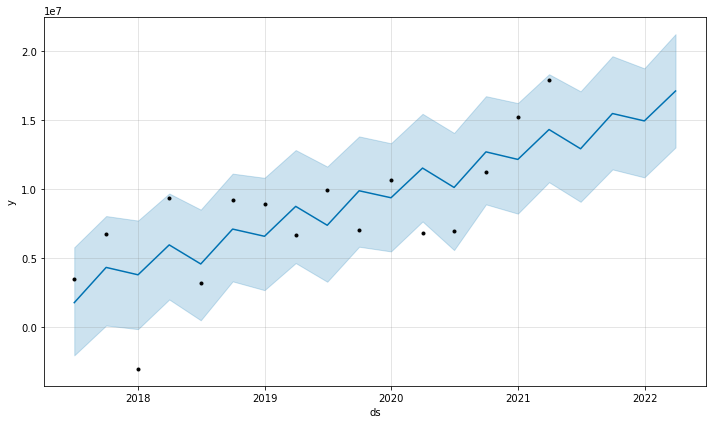

In [ ]:
fig1 = model_Prophet.plot(forecast)

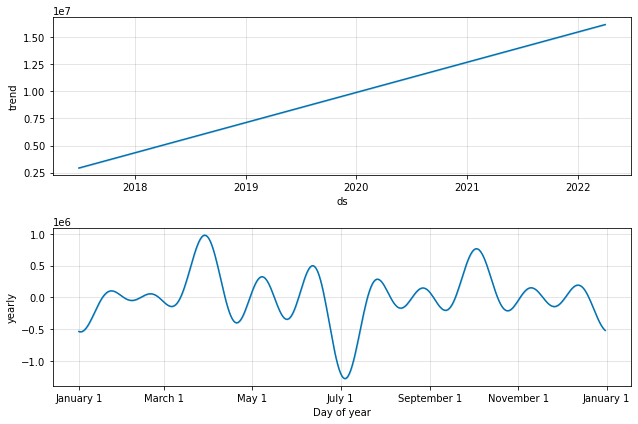

In [ ]:
fig2 = model_Prophet.plot_components(forecast)

In [ ]:
test_data['Predicted_Prophet'] = forecast[-(len(proph_test)):][['ds', 'yhat']].set_index('ds')

<AxesSubplot:xlabel='time'>

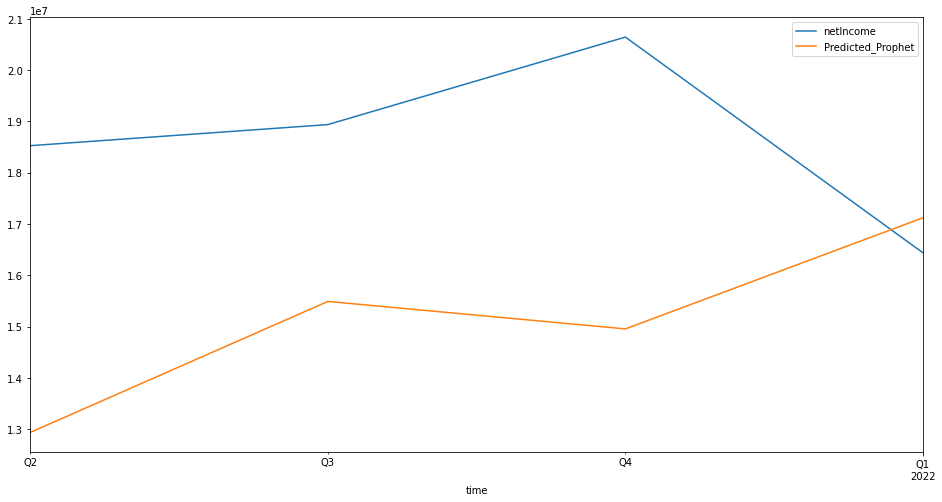

In [ ]:
test_data[[value_col, 'Predicted_Prophet']].plot(figsize=(16,8))

## Metrics

In [ ]:
timeseries_evaluation_metrics_func(test_data.netIncome, test_data.Predicted_ETS)

Evaluation metric results:-
Mean Square Error is : 31662979554649.312
Mean Absolute Error is : 5061350.908337481
Root Mean Square Error is : 5626986.720674691
Mean Absolute Percentage Error is : 26.313332026367863
R2 score is : -13.125246909239776

Weighted MAPE: 0.27160820018178305


In [ ]:
timeseries_evaluation_metrics_func(test_data.netIncome, test_data.Predicted_ARIMA)

Evaluation metric results:-
Mean Square Error is : 30815901107711.977
Mean Absolute Error is : 4728242.0650229575
Root Mean Square Error is : 5551207.175715204
Mean Absolute Percentage Error is : 24.27785013073129
R2 score is : -12.747354734126134

Weighted MAPE: 0.25373251935351737


In [ ]:
timeseries_evaluation_metrics_func(test_data.netIncome, test_data.Predicted_SARIMAX)

Evaluation metric results:-
Mean Square Error is : 30815901107711.977
Mean Absolute Error is : 4728242.0650229575
Root Mean Square Error is : 5551207.175715204
Mean Absolute Percentage Error is : 24.27785013073129
R2 score is : -12.747354734126134

Weighted MAPE: 0.25373251935351737


In [ ]:
timeseries_evaluation_metrics_func(test_data.netIncome, test_data.Predicted_Prophet)

Evaluation metric results:-
Mean Square Error is : 18990227547965.125
Mean Absolute Error is : 3852484.95322531
Root Mean Square Error is : 4357777.822235218
Mean Absolute Percentage Error is : 20.025131021386102
R2 score is : -7.471775453560134

Weighted MAPE: 0.2067366051718059


### Conclusion:

Based on WMAPE value the Prophet model provide the best prediction.

Order from best to worse models: Propeht, ETS, and ARIMA/SARIMAX. 

But given the R2 score are all single/double digit negative on all models, the results are not reliable prediction. 